In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
%matplotlib inline

## Implicit Differentiation

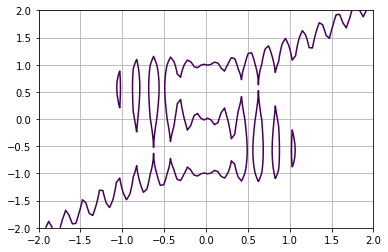

In [19]:
a = -1
b = 1

y, x = np.ogrid[-2:2:100j, -2:2:100j]
plt.contour(x.ravel(), y.ravel(), y**3-y - x**3 + x*np.cos(30*x), [0])
plt.grid()
plt.show()



## Visualizing Riemann Sums, Approximation as an appendix!

We're going to try illusrate the idea of Riemann sums using computer code to compute out estimates. Suppose we have a function $f$. The basic formula for the Riemann sums for $f$ on $[a,b]$ is given by 
$$ L(f)=\sum_{i=1}^{n}f(x_{i-1})(x_i-x_{i-1})$$ and $$U(f)=\sum_{i=1}^{n}f(x_i)(x_i-x_{i-1})$$
where the $x_i$ form a  *paritition* of $[a,b]$ i.e. $a=x_o<x_1< x_2 \ldots <x_n=b$. The following code will compute and plot the Riemann sum of an arbitrary function $f(x)$ from $[a,b]$ using $n$ subintervals of equal length. 

I plan to include section or appendix on how this can be used to approximate integral of difficult integral like $e^{\sin x}+e^{-\cos x}-2$ accurately with some more heavy math like in [this](https://www.math.ubc.ca/~pwalls/math-python/integration/riemann-sums/).

In [16]:
def riemannsum(f, a, b, n, method):

    ## Generates partition using $N$ equal intervals $P=\{x_i=a+ i\cdot \frac{b-a}{N} \mid i=0,1, 2, \ldots N\}$.        
    x = np.linspace(a, b, n+1) 
    dx = (b-a)/n
    
    ## Generates points for plot.
    X = np.linspace(a,b, 30*n+1)
    Y = f(X)
    
    if method == 'left':
        ## Take left end points of the partition.
        x = x[:-1]
        y = f(x)
        
        ## Plot the approximation $L(f)$.
        plt.plot(X,Y,'black')
        plt.plot(x,y,'b.',markersize=10)
        plt.plot([a, b], [0, 0], 'k-', lw=1)
        plt.bar(x,y,width=dx,alpha=0.4,align='edge',edgecolor='black', color='aqua')
        plt.title('Left Sum for n = {}'.format(n))
        
        ## Compute and return our approximation $L(f)$
        return(np.sum(y*dx))
    elif method == 'middle':
        ## Take middle points of the partition.
        x = (x[:-1] + x[1:])/2
        y = f(x)
        
        ## Plot the approximation $M(f)$.
        plt.plot(X,Y,'black')
        plt.plot(x,y,'b.',markersize=10)
        plt.plot([a, b], [0, 0], 'k-', lw=1)
        plt.bar(x,y,width=dx,alpha=0.4,edgecolor='black', color='aqua')
        plt.title('Midpoint Sum for n = {}'.format(n))
        
        ## Compute and return our approximation $M(f)$
        return(np.sum(y*dx))
        
    elif method == 'right':
        ## Take right end points of the partition.
        x=x[1:]
        y=f(x)
        
        ## Plot the approximation $U(f)$
        plt.plot(X,Y,'black')
        plt.plot(x,y,'b.',markersize=10)
        plt.plot([a, b], [0, 0], 'k-', lw=1)
        plt.bar(x,y, width=-dx,alpha=0.4, align='edge', edgecolor='black', color='aqua')
        plt.title('Right Sum for n = {}'.format(n))
        
        ## Compute and return our approximation $U(f)$
        return(np.sum(y*dx))

2.0

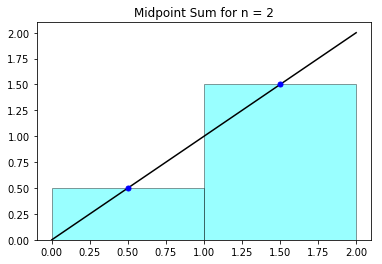

In [17]:
def f (x):
    return x
riemannsum(f, a=0, b=2, n=2, method='middle')


-1.2445632421557553

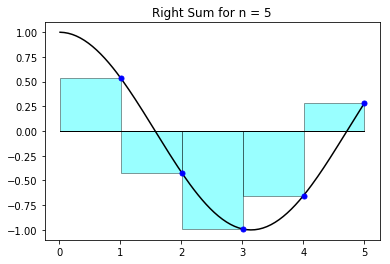

In [21]:
def f (x):
    return np.cos(x)
riemannsum(f, a=0.01, b=5, n=5, method='right')





## Accuracy of this method.

In trying to find the accuracy of this method, we need to find some way to bound the error of the Riemann sum and the integral. For this, we rely on the following theorem.

If $f$ is a differentiable function on $[a,b]$ and $\abs{f'(x)}\leq M$, then
$$E_n=\abs{ \int_{a}^{b} f(x)dx- I_n(f)}\leq M\frac{(b-a)^2}{n},$$
where $I_n$ is either the left or right Riemann sum with $n$ subintervals.

If, in addition, we know that $f$ is increasing or decreasing, then we have
$$E_n=\abs{ \int_{a}^{b} f(x)dx- I_n(f)}\leq \abs{f(b)-f(a)}\frac{b-a}{n}$$

The case of $f(x)=e^{\sin x}+e^{-\cos x}-2$ on the interval $[-\frac{\pi}{4},\frac{7\pi}{4}]$ , we have $f'(x)=\cos(x)\cdot e^{\sin(x)}+\sin(x)\cdot e^{\cos(x)}$. Applying the triangle inequality, we see that $\abs{f'(x)}\leq \abs{\cos(x)\cdot e^{\sin(x)}} +\abs{\sin(x)\cdot e^{\cos(x)}}$. Using the fact $\abs{\sin x}, \abs{\cos x}\leq 1$ and $e^x$ is montonically increasing, we say that $\abs{f'(x)}\leq 2e-2$. Therefore by the theorem above, we see that
$$ E_n\leq (2e-2)\cdot\frac{(2\pi)^2}{n}<\frac{135.67}{n}$$

Computing this, we see our error $E_n$ is bounded by $\frac{135.67}{n}$. Therefore, if we want to compute this integral within $.1$, we see we must solve the inequality 
$$\frac{135.67}{n} <0.1$$
giving us $n=1357$.

3.3434824276665185

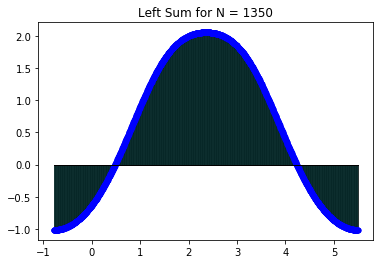

In [199]:
def f (x):
    return np.e**(np.sin(x))+np.e**(-np.cos(x))-2
riemannsum(f, a=-np.pi/4, b=7*np.pi/4, N=1350, method='left')




We can repeat this analysis on a function for which we know the value of the integral already. Consider $f(x)=\sqrt{2-x^2}$. Simple geometry shows this is a half circle with radius $\sqrt{2}$ and that area of this circle is given by $$\int_{-\sqrt{2}}^{\sqrt{2}}\sqrt{2-x^2}dx=\pi.$$ Therefore, we can see that $\abs{f(x)}\leq 1$ and that our error $E_n$ is bounded by $\frac{16}{n}$. Therefore, we can estimate $\pi$ within a certain value using this integral.Once again applying the first theorem, and in doing so, we see that we need $n=16000$ to approximate $pi$ within $0.001$. We check this with the code below.

True


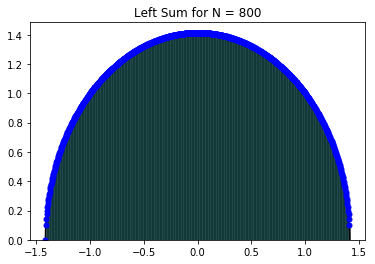

In [223]:
def f (x):
    return np.sqrt(np.abs(2-x**2))
estimate = riemannsum(f, a=-np.sqrt(2), b=np.sqrt(2), N=16000, method='left')


print(np.abs(estimate - np.pi) < 0.001)


In [221]:
print(estimate)

3.14159101027


Since the bound we used was crude, relying on the *worst case* estimate, $n=16000$ may not be the minimum $n$ needed, but that any $n>16000$ is guarrenteed to work. Testing, we can see that $n=800$ is suffiecent for the accuracy we wanted. Even though computationally, we can't actually get the limit the above theorem helps us to see what the limit might exist. Ideally, we don't want to have to use these methods everytime we want to solve an integral problem, so the next section will develop 'short-cuts' we can use in calculating the derivative.

In [113]:
##Edit above code to be consistent with my notation!

## Newton's Method
Can use this to find roots, also a way of approximating a function local when shit gets complicated.

If applied to the derivative of a function, we can use this to find its critical points i.e. the points where $f'(0)=0$. Therefore, we can also apply this principle to optimization problems.

## Optimization

## Solids of Revolution 
   This is gonna require 3-d graphing which is gonna be wow! 

## Derivative as Hyperplane

## Monte Carlo
Monte carlo integration as a probablitistic way to integrate in higher dimensions

## Neural Nets 
Explaining calculus behind Neural Nets with lots of graphs

3.141592653589793